In [48]:
# Ham veri ile etiket olmadan veri içindeki kalıp-patternleri arıyoruz.

In [49]:
from sklearn.datasets import make_blobs

In [50]:
X, y_true = make_blobs(n_samples = 300, centers = 4,random_state = 42, cluster_std = 1.0)

In [51]:
import matplotlib.pyplot as plt

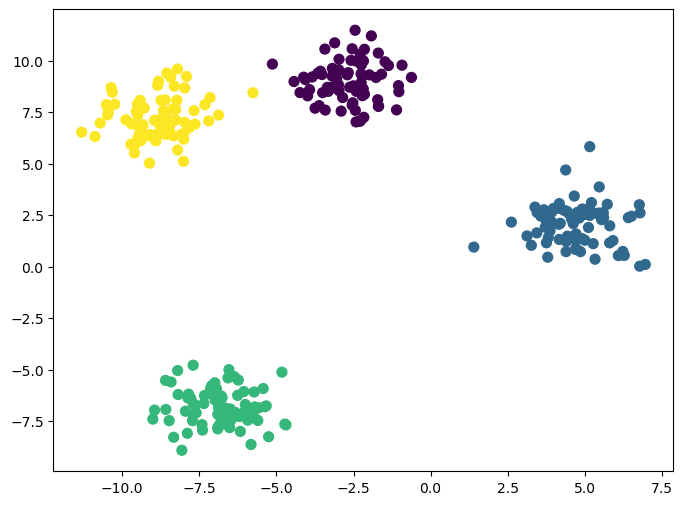

In [52]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c= y_true, s=50,cmap = "viridis")

In [53]:
import pandas as pd

In [54]:
df = pd.read_csv("Mall_Customers.csv")
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [55]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [56]:
X = df[ ["Annual Income (k$)","Spending Score (1-100)"] ].values

In [82]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 5)
model.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [83]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [84]:
y = model.predict(X) # Her veriyi belirlediği grup merkezine göre en yakın gruba atadı.
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

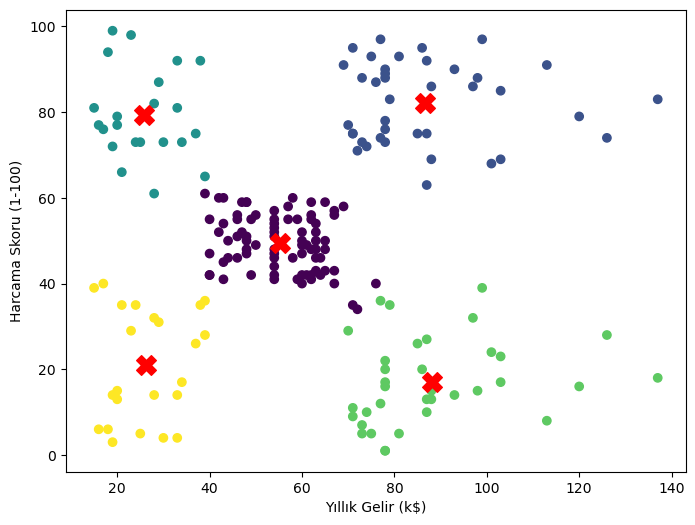

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=200, marker="X", c="red")
plt.xlabel("Yıllık Gelir (k$)")
plt.ylabel("Harcama Skoru (1-100)")
plt.show()


In [86]:
model.inertia_

44448.4554479337

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

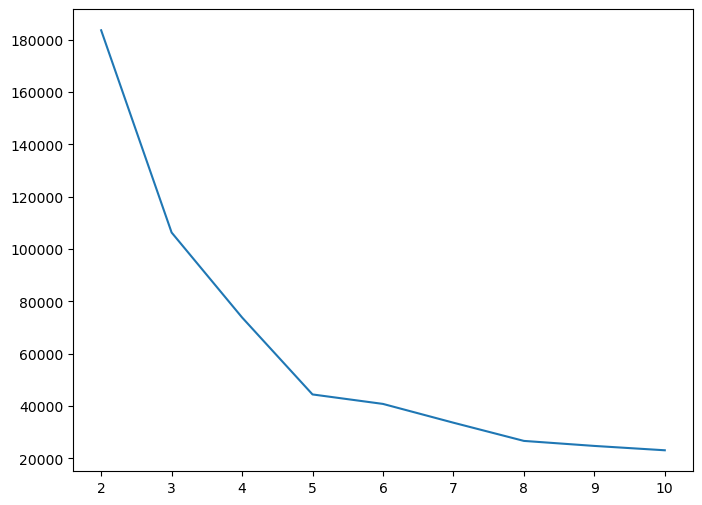

In [87]:
#inertia -> Her bir noktanın kendi küme merkezine olan uzaklığının karelerinin toplamıdır.

def elbow_method():
    inertias = []
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11),inertias)

elbow_method()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

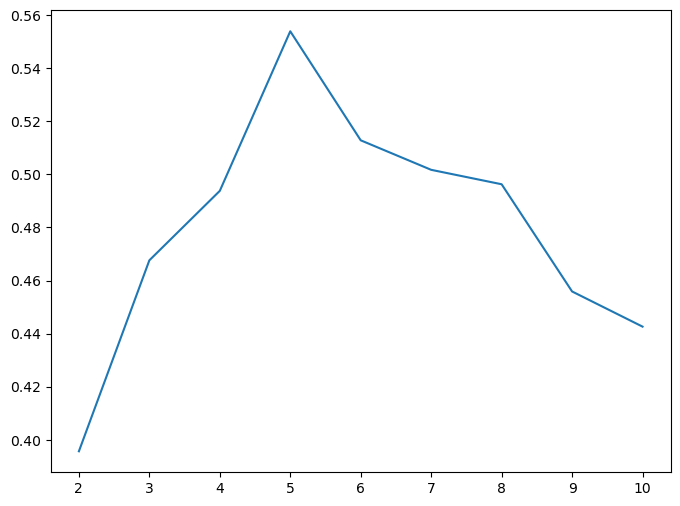

In [91]:
#Silhoutte Method -> Kendi kümesine yakınlık + diğer kümelere uzaklık
from sklearn.metrics import silhouette_score
def my_sihouette_method():
    scores = []
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k,random_state=42)
        y = kmeans.fit_predict(X)
        scores.append(silhouette_score(X,y))
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11),scores)

my_sihouette_method()

In [92]:
# Davies Bouldin Method -> ÖDEV 1 araştırılıp yukarıdaki 2 örnek gibi grafikte en iyi skor bulunacak.

In [ ]:
# ODEV2 -> Scaling, (Özellik Ölçekleme) hakkında araştırma yapıp bir markdowb dosyası oluşturulur.